In [13]:
import logging
import h5py
import numpy as np
import warnings
from utils import plot_cluster, color_spatialciteseq
from SMOPCA import SMOPCA
from sklearn.cluster import KMeans

for handler in logging.root.handlers[:]:  # avoid DEBUG level information in jupyter notebook
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)  # use DEBUG for verbose information
warnings.filterwarnings('ignore')

data_file = h5py.File("../data/RealData/SpatialCITEseq/Humantonsil_filtered.h5", 'r')
X1 = np.array(data_file['normalized_svg_count'])  # normalized svg count generated by SPARK
X2 = np.array(data_file['normalized_protein_count'])
pos = np.array(data_file['pos'])
pos[:, 1] *= -1  # to fit the H&E image
data_file.close()

INFO:SMOPCA:SMOPCA object created, with 2491 cells and [959, 283] features
INFO:SMOPCA:calculating matern kernel, nu = 1.5, length_scale = 5
INFO:SMOPCA:start estimating parameters, this will take a while...
INFO:SMOPCA:estimating sigma1
INFO:SMOPCA:sigma1 using bound: (0.90000, 1.00000)
INFO:SMOPCA:iter 0 sigma1 brentq done, sigma1sqr = 1.00000, sigma1hatsqr = 0.96638
INFO:SMOPCA:iter 1 sigma1 brentq done, sigma1sqr = 0.96638, sigma1hatsqr = 0.96636
INFO:SMOPCA:reach tolerance threshold, sigma1 done!
INFO:SMOPCA:estimating sigma2
INFO:SMOPCA:sigma2 using bound: (0.80000, 0.90000)
INFO:SMOPCA:iter 0 sigma2 brentq done, sigma2sqr = 1.00000, sigma2hatsqr = 0.87463
INFO:SMOPCA:iter 1 sigma2 brentq done, sigma2sqr = 0.87463, sigma2hatsqr = 0.87455
INFO:SMOPCA:iter 2 sigma2 brentq done, sigma2sqr = 0.87455, sigma2hatsqr = 0.87455
INFO:SMOPCA:reach tolerance threshold, sigma2 done!
INFO:SMOPCA:estimation complete!
INFO:SMOPCA:sigma1hatsqr = 0.96636
INFO:SMOPCA:sigma2hatsqr = 0.87455
INFO:SMO

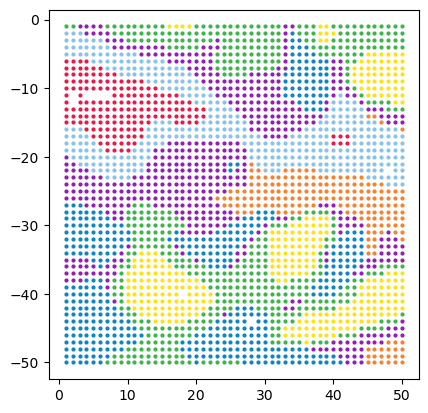

In [14]:
smopca = SMOPCA(Y_list=[X1.T, X2.T], Z_dim=20)
smopca.buildKernel(pos=pos, kernel_type='matern', length_scale=5)
smopca.estimateSigmaW(sigma_init_list=(1, 1), tol=2e-5, sigma_xtol_list=(1e-6, 1e-6))
z = smopca.calculatePosterior()
y_pred = KMeans(n_clusters=7, n_init=100).fit_predict(z.T)
plot_cluster(labels=y_pred, pos=pos, colorList=color_spatialciteseq, pointSize=2)